In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [30]:
fraud_transactions = pd.read_csv('./datasets/creditcard-modified.csv',index_col=0)
fraud_transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
260880,159763.0,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,...,-0.276175,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,16.99,0
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,...,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
201575,133944.0,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,...,0.264264,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,10.00,0
81055,58769.0,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,...,0.041651,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,101.49,0


In [31]:
fraud_df=fraud_transactions.drop(columns=['Class'])
fraud_df.shape

(30000, 30)

In [32]:
#scaling the left out numerical features
std_scaler = StandardScaler()
fraud_df[['Time','Amount']] = std_scaler.fit_transform(fraud_df[['Time','Amount']])
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.124130,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.221189
49906,-1.066069,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.909989
29474,-1.250975,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.250634
276481,1.522278,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.380947
278846,1.550719,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.383641


In [41]:
pca = PCA(n_components=2)
pca_fit= pca.fit(fraud_df)
pca_transform = pca_fit.transform(fraud_df)
pca_transform.shape

(30000, 2)

In [42]:
var = pca.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))


Explained variation per principal component: [0.12114828 0.09441768]
Cumulative variance explained by 2 principal components: 21.56%


In [43]:
    dataset_pca = pd.DataFrame(abs(pca.components_), columns=fraud_df.columns, index=['PC_1', 'PC_2'])
    print('\n\n', dataset_pca)



           Time        V1        V2        V3        V4        V5        V6  \
PC_1  0.077079  0.980611  0.086244  0.004881  0.021725  0.008424  0.014418   
PC_2  0.054376  0.131544  0.905669  0.097909  0.023265  0.031490  0.027112   

            V7        V8        V9  ...       V20       V21       V22  \
PC_1  0.039739  0.012311  0.006121  ...  0.008586  0.000594  0.001068   
PC_2  0.045972  0.040543  0.012127  ...  0.020976  0.019096  0.003887   

           V23       V24       V25       V26       V27       V28    Amount  
PC_1  0.001801  0.002928  0.003752  0.000114  0.006323  0.005128  0.148803  
PC_2  0.001486  0.000847  0.003948  0.002432  0.003384  0.005633  0.377688  

[2 rows x 30 columns]


In [45]:
print("\n*************** Most important features *************************")
print('As per PC 1:\n', (dataset_pca[dataset_pca > 0.2].iloc[0]).dropna())   
print('\n\nAs per PC 2:\n', (dataset_pca[dataset_pca > 0.2].iloc[1]).dropna())
print("\n******************************************************************")


*************** Most important features *************************
As per PC 1:
 V1    0.980611
Name: PC_1, dtype: float64


As per PC 2:
 V2        0.905669
Amount    0.377688
Name: PC_2, dtype: float64

******************************************************************


In [73]:
x1=fraud_df['V2']
x2=fraud_df['V1']
y=fraud_df['Amount']

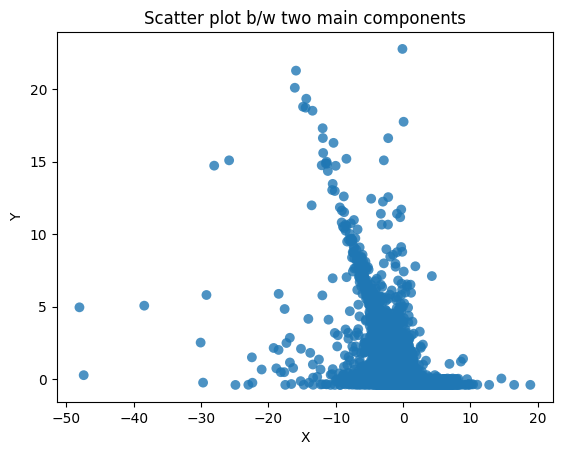

In [74]:
plt.scatter(x1,y, s=50, cmap='coolwarm', alpha=0.8, edgecolors='none')



# Add axis labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot b/w two main components')

plt.show()

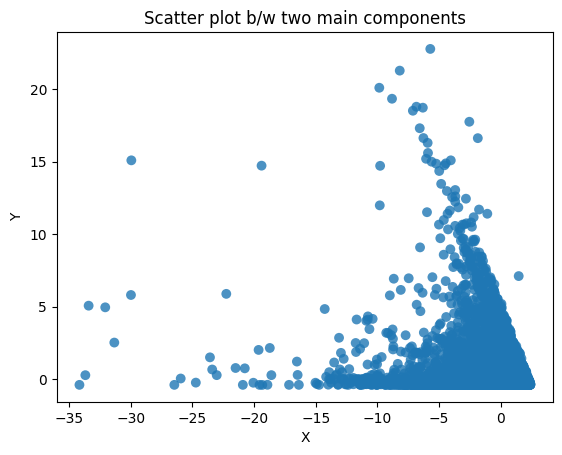

In [75]:
plt.scatter(x2,y, s=50, cmap='coolwarm', alpha=0.8, edgecolors='none')



# Add axis labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot b/w two main components')

plt.show()

Parameter: {'n_clusters': 2} Score 0.10378117605237344
Parameter: {'n_clusters': 3} Score 0.1058002197145569
Parameter: {'n_clusters': 4} Score 0.10801896346004164
Parameter: {'n_clusters': 5} Score 0.11923788345612119
Parameter: {'n_clusters': 6} Score 0.08766009354935013
Parameter: {'n_clusters': 7} Score 0.0853520347612592
Parameter: {'n_clusters': 8} Score 0.08727244794076454
Parameter: {'n_clusters': 9} Score 0.0863362482849201
Parameter: {'n_clusters': 10} Score 0.08870063172737111
Parameter: {'n_clusters': 11} Score 0.08756033188052058
Parameter: {'n_clusters': 12} Score 0.09671313085518886
Parameter: {'n_clusters': 13} Score 0.09751192982538073
Parameter: {'n_clusters': 14} Score 0.10577138075549228
Parameter: {'n_clusters': 15} Score 0.10421493979435036


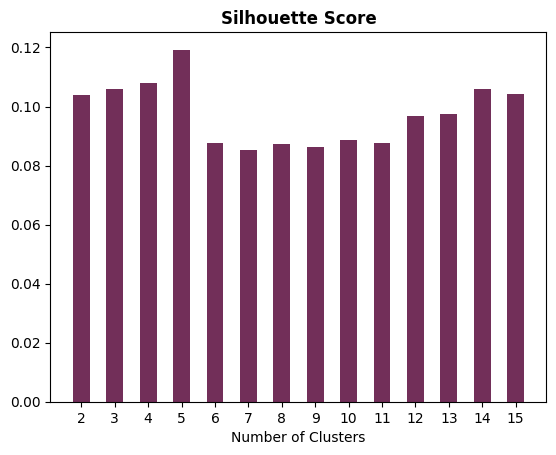

In [49]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
# Values for our number of cluster
parameters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]
# instantiating ParameterGrid, pass number of clusters as input
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
kmeans_model = KMeans()     # instantiating KMeans model
silhouette_scores = []
# evaluation based on silhouette_score
for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    kmeans_model.fit(fraud_df)          # fit model on fraud dataset, this will find clusters based on parameter p
    ss = metrics.silhouette_score(fraud_df, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    # check p which has the best score
    if ss > best_score:
        best_score = ss
        best_grid = p
# plotting silhouette score
plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [50]:
# From the above silhoutte score we can see that for clusters= 5 the score is maximum so we will try for 5 clusters
kmeans = KMeans(n_clusters=5)  
kmeans.fit(fraud_df)

KMeans(n_clusters=5)

In [51]:
kmeans.cluster_centers_

array([[-8.14416954e-01,  3.52210005e-01,  2.38377231e-02,
         8.40038307e-01,  6.34475599e-01, -4.62581352e-01,
        -3.21737641e-03, -1.58731807e-01,  3.87089033e-02,
        -1.16977123e-01,  8.51629254e-02,  2.51648213e-01,
         3.30175574e-02,  8.13365066e-03,  6.68587414e-02,
         3.03758491e-01, -1.25468521e-01,  1.48857934e-01,
        -9.15731894e-02,  1.16307125e-01,  2.05530794e-02,
        -3.58602593e-02, -4.96599543e-02, -3.70891888e-02,
         4.07447546e-05,  1.25700548e-01,  4.34236158e-02,
         1.43237607e-02,  2.01234555e-02, -7.37750150e-02],
       [-2.58706448e-04, -4.53382773e+00, -5.77045143e+00,
        -1.34291612e+00,  1.05489814e+00, -4.26649652e-01,
         1.57574335e-01,  1.09708832e+00, -5.11948362e-01,
         1.16261880e-02, -2.00157190e-01,  6.35551852e-02,
        -2.94951641e-03,  5.00877994e-02,  3.69872847e-02,
         5.60996498e-02,  1.30781327e-01, -5.67640926e-03,
         1.30635147e-04, -7.20784727e-03,  5.24724461e-

In [52]:
kmeans.labels_[:10]

array([2, 0, 0, 3, 4, 3, 4, 3, 4, 1], dtype=int32)

Text(0, 0.5, 'Second principle component')

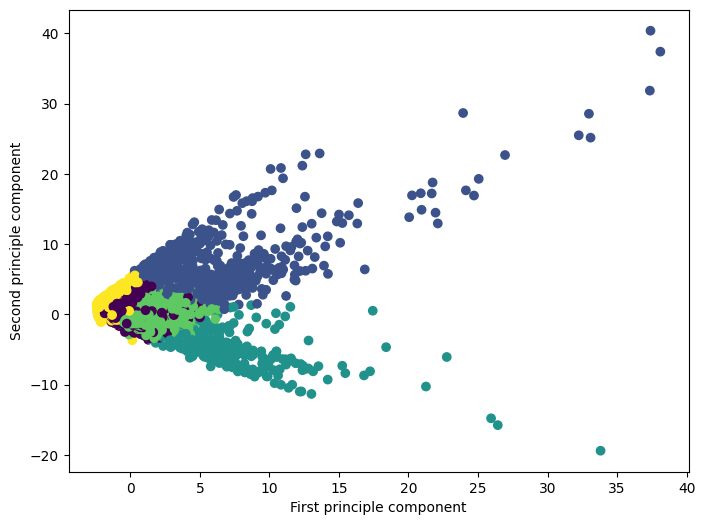

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(pca_transform[:,0],pca_transform[:,1],c=kmeans.labels_)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [60]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.3, min_samples=40).fit(fraud_df)

In [61]:
dbs.labels_

array([-1, -1, -1, ..., -1, -1, -1])

Text(0, 0.5, 'Second principle component')

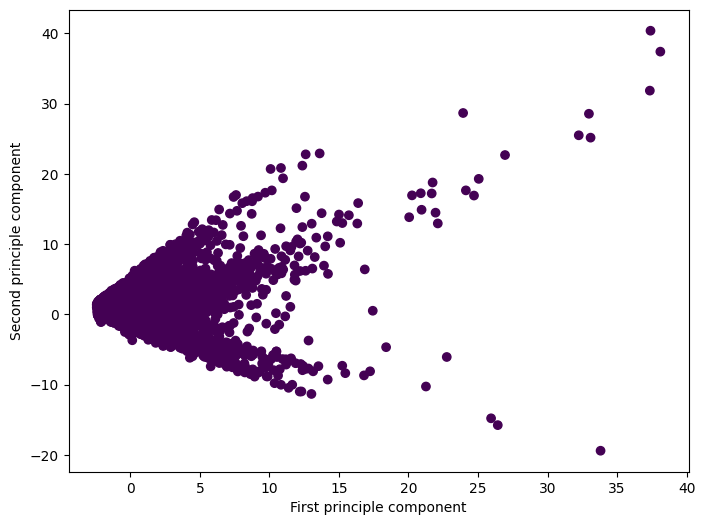

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(pca_transform[:,0],pca_transform[:,1],c=dbs.labels_)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [20]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.124130,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.221189
49906,-1.066069,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.909989
29474,-1.250975,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.250634
276481,1.522278,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.380947
278846,1.550719,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.383641


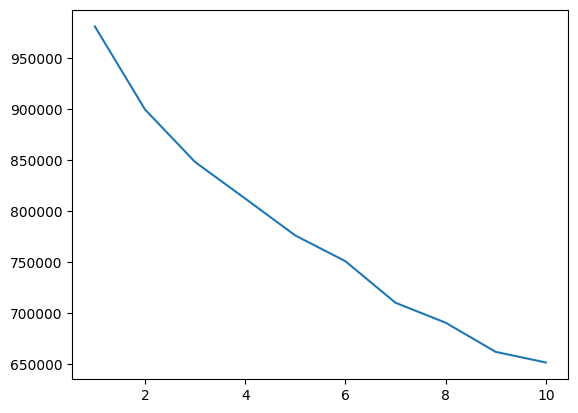

In [21]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(fraud_df)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);